# Libraries

In [1]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from utils.Validator import *
from utils.Combinations import *
from utils.NetworkDraw import *
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Data Consolidation

In [3]:
df_net_metrics = pd.read_csv(r"../data/interim/UserNetworksMetrics.csv")
df_net_metrics["UserId"] = df_net_metrics["UserId"].astype(str)
df_net_metrics.head()

,UserId,UserName,PerformanceTier_Cat,Seniority_Cat,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums
0,368,antgoldbloom,Expert,4_mas,983.0,6.0,0.002690,0.001607,4.0,0.000026,9.451808e-26,NaN,NaN,NaN,1320.0,0.006309,0.00126
1,381,iguyon,Expert,4_mas,6.0,0.0,0.000016,0.000003,NaN,NaN,NaN,163.0,0.001037,0.000024,164.0,0.000784,0.00006
2,383,davidstephan,Novice,4_mas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,384,gabewarren,Novice,4_mas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,385,demonjosh,Novice,4_mas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_user_achi = pd.read_csv(r"../data/interim/UserAchievements.csv")
df_user_achi["UserId"] = df_user_achi["UserId"].astype(str)
df_user_achi.head()

,UserId,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
0,368,232.0,0.0,0.0,0.0,41.0,0.0,3.0,13.0,218.0,14.0,13.0,139.0,79.0,1.0,3.0,6.0
1,381,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,0.0
2,383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_user_datacont = pd.read_csv(r"../data/interim/UserDataContInfo.csv")
df_user_datacont["UserId"] = df_user_datacont["UserId"].astype(str)
df_user_datacont.head()

,UserId,Datasets
0,1,427
1,10000154,1
2,1000113,1
3,10001151,2
4,10001200,1


In [8]:
df_user_comments = pd.read_csv(r"../data/interim/UserComentsInfo.csv")
df_user_comments["UserId"] = df_user_comments["UserId"].astype(str)
df_user_comments.head()

,UserId,comentarios,comentarios_premiados,ratio_comentarios_premiados
0,10000014,20,11,0.55
1,10000037,1,1,1.00
2,1000019,1,0,0.00
3,10000220,1,0,0.00
4,10000271,10,1,0.10


In [9]:
df_user_parti = pd.read_csv(r"../data/interim/UserParticipantInfo.csv")
df_user_parti["UserId"] = df_user_parti["UserId"].astype(str)
df_user_parti.head()

,UserId,competencias,competencias_premiadas,ratio_competencias_premiadas
0,1,1,0,0.0
1,1000,1,0,0.0
2,10000028,1,0,0.0
3,10000057,1,0,0.0
4,1000009,1,0,0.0


In [10]:
df_user_final = df_net_metrics.merge(df_user_achi,how="left",on=["UserId"])\
    .merge(df_user_datacont,how="left",on=["UserId"])\
        .merge(df_user_comments,how="left",on=["UserId"])\
            .merge(df_user_parti,how="left",on=["UserId"])
df_user_final.head()

,UserId,UserName,PerformanceTier_Cat,Seniority_Cat,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Datasets,comentarios,comentarios_premiados,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas
0,368,antgoldbloom,Expert,4_mas,983.0,6.0,0.002690,0.001607,4.0,0.000026,9.451808e-26,NaN,NaN,NaN,1320.0,0.006309,0.00126,232.0,0.0,0.0,0.0,41.0,0.0,3.0,13.0,218.0,14.0,13.0,139.0,79.0,1.0,3.0,6.0,21.0,573.0,153.0,0.267016,98.0,0.0,0.0
1,381,iguyon,Expert,4_mas,6.0,0.0,0.000016,0.000003,NaN,NaN,NaN,163.0,0.001037,0.000024,164.0,0.000784,0.00006,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,0.0,NaN,263.0,54.0,0.205323,9.0,0.0,0.0
2,383,davidstephan,Novice,4_mas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,384,gabewarren,Novice,4_mas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,385,demonjosh,Novice,4_mas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
del df_net_metrics,df_user_achi,df_user_datacont,df_user_comments,df_user_parti

In [12]:
df_user_final.to_csv(r"../data/interim/UserFeaturesFinal.csv",index=False)

# Tratamiento de Nulos

In [4]:
df_user_final = pd.read_csv(r"../data/interim/UserFeaturesFinal.csv")
df_user_final["UserId"] = df_user_final["UserId"].astype(str)

In [5]:
df_user_final.isnull().sum()

UserId                                 0
UserName                               0
PerformanceTier_Cat                    0
Seniority_Cat                          0
in_degree_followers              9721922
out_degree_followers             9721922
in_degree_cent_followers         9721922
pagerank_cent_followers          9721922
degree_teams                     9935822
degree_cent_teams                9935822
eigenvector_cent_teams           9935822
degree_participant               9934133
degree_cent_participant          9934133
eigenvector_cent_participant     9934133
degree_forums                    9878142
degree_cent_forums               9878142
eigenvector_cent_forums          9878142
Points_Comp                            2
TotalGold_Comp                         2
TotalSilver_Comp                       2
TotalBronze_Comp                       2
Points_Scri                            2
TotalGold_Scri                         2
TotalSilver_Scri                       2
TotalBronze_Scri

In [6]:
round(df_user_final.isnull().sum()/df_user_final.shape[0]*100,2)

UserId                           0.00
UserName                         0.00
PerformanceTier_Cat              0.00
Seniority_Cat                    0.00
in_degree_followers             96.38
out_degree_followers            96.38
in_degree_cent_followers        96.38
pagerank_cent_followers         96.38
degree_teams                    98.50
degree_cent_teams               98.50
eigenvector_cent_teams          98.50
degree_participant              98.48
degree_cent_participant         98.48
eigenvector_cent_participant    98.48
degree_forums                   97.93
degree_cent_forums              97.93
eigenvector_cent_forums         97.93
Points_Comp                      0.00
TotalGold_Comp                   0.00
TotalSilver_Comp                 0.00
TotalBronze_Comp                 0.00
Points_Scri                      0.00
TotalGold_Scri                   0.00
TotalSilver_Scri                 0.00
TotalBronze_Scri                 0.00
Points_Disc                      0.00
TotalGold_Di

In [7]:
df_user_final_2 = df_user_final.copy()

In [8]:
# Primero crearemos unos flag para saber si un usuario esta o no en la red
df_user_final_2["Flg_IsIn_Followers_Net"] = np.where(df_user_final_2["in_degree_followers"].isnull(),"No","Si")
df_user_final_2["Flg_IsIn_Teams_Net"] = np.where(df_user_final_2["degree_teams"].isnull(),"No","Si")
df_user_final_2["Flg_IsIn_ParticipantComp_Net"] = np.where(df_user_final_2["degree_participant"].isnull(),"No","Si")
df_user_final_2["Flg_IsIn_Forums_Net"] = np.where(df_user_final_2["degree_forums"].isnull(),"No","Si")

df_user_final_2["Flg_IsIn_SomeNet"] = np.where( (df_user_final_2["Flg_IsIn_Followers_Net"]=="No") &
                                                (df_user_final_2["Flg_IsIn_Teams_Net"]=="No") &
                                                (df_user_final_2["Flg_IsIn_ParticipantComp_Net"]=="No") &
                                                (df_user_final_2["Flg_IsIn_Forums_Net"]=="No"),"No","Si")

df_user_final_2.head()

,UserId,UserName,PerformanceTier_Cat,Seniority_Cat,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Datasets,comentarios,comentarios_premiados,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_ParticipantComp_Net,Flg_IsIn_Forums_Net,Flg_IsIn_SomeNet
0,368,antgoldbloom,Expert,4_mas,983.0,6.0,0.002690,0.001607,4.0,0.000026,9.451808e-26,NaN,NaN,NaN,1320.0,0.006309,0.00126,232.0,0.0,0.0,0.0,41.0,0.0,3.0,13.0,218.0,14.0,13.0,139.0,79.0,1.0,3.0,6.0,21.0,573.0,153.0,0.267016,98.0,0.0,0.0,Si,Si,No,Si,Si
1,381,iguyon,Expert,4_mas,6.0,0.0,0.000016,0.000003,NaN,NaN,NaN,163.0,0.001037,0.000024,164.0,0.000784,0.00006,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,0.0,NaN,263.0,54.0,0.205323,9.0,0.0,0.0,Si,No,Si,Si,Si
2,383,davidstephan,Novice,4_mas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No
3,384,gabewarren,Novice,4_mas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No
4,385,demonjosh,Novice,4_mas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No


In [9]:
#Reemplazaremos valores NA por 0 para los usuarios que no estan en cada una de las reds
df_user_final_2.fillna(0,inplace=True)
df_user_final_2.head()

,UserId,UserName,PerformanceTier_Cat,Seniority_Cat,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Datasets,comentarios,comentarios_premiados,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_ParticipantComp_Net,Flg_IsIn_Forums_Net,Flg_IsIn_SomeNet
0,368,antgoldbloom,Expert,4_mas,983.0,6.0,0.002690,0.001607,4.0,0.000026,9.451808e-26,0.0,0.000000,0.000000,1320.0,0.006309,0.00126,232.0,0.0,0.0,0.0,41.0,0.0,3.0,13.0,218.0,14.0,13.0,139.0,79.0,1.0,3.0,6.0,21.0,573.0,153.0,0.267016,98.0,0.0,0.0,Si,Si,No,Si,Si
1,381,iguyon,Expert,4_mas,6.0,0.0,0.000016,0.000003,0.0,0.000000,0.000000e+00,163.0,0.001037,0.000024,164.0,0.000784,0.00006,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,0.0,0.0,263.0,54.0,0.205323,9.0,0.0,0.0,Si,No,Si,Si,Si
2,383,davidstephan,Novice,4_mas,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No,No,No,No,No
3,384,gabewarren,Novice,4_mas,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No,No,No,No,No
4,385,demonjosh,Novice,4_mas,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No,No,No,No,No


In [10]:
df_user_final_2.isnull().sum()

UserId                          0
UserName                        0
PerformanceTier_Cat             0
Seniority_Cat                   0
in_degree_followers             0
out_degree_followers            0
in_degree_cent_followers        0
pagerank_cent_followers         0
degree_teams                    0
degree_cent_teams               0
eigenvector_cent_teams          0
degree_participant              0
degree_cent_participant         0
eigenvector_cent_participant    0
degree_forums                   0
degree_cent_forums              0
eigenvector_cent_forums         0
Points_Comp                     0
TotalGold_Comp                  0
TotalSilver_Comp                0
TotalBronze_Comp                0
Points_Scri                     0
TotalGold_Scri                  0
TotalSilver_Scri                0
TotalBronze_Scri                0
Points_Disc                     0
TotalGold_Disc                  0
TotalSilver_Disc                0
TotalBronze_Disc                0
Points_Data   

In [11]:
df_user_final_2["Flg_IsIn_SomeNet"].value_counts(normalize=True)

No    0.932977
Si    0.067023
Name: Flg_IsIn_SomeNet, dtype: float64

In [12]:
df_user_final_2["Flg_IsIn_SomeNet"].value_counts()

No    9411301
Si     676082
Name: Flg_IsIn_SomeNet, dtype: int64

Solo el 7% de registros esta en una red, por lo que para poder proceder con la evaluacion dividiremos el dataframe para tratar de clasificar por separado a los usuarios que no pertenecen a ninguna red y a los usuarios que si pertenecen al menos a una.

In [13]:
df_nets = df_user_final_2[df_user_final_2["Flg_IsIn_SomeNet"]=="Si"] # 7%
df_others = df_user_final_2[df_user_final_2["Flg_IsIn_SomeNet"]=="No"] #93%

cols_others = [ 'UserId', 'UserName','PerformanceTier_Cat','Seniority_Cat',
                'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp',
                'TotalGold_Scri', 'TotalSilver_Scri', 'TotalBronze_Scri',
                'TotalGold_Disc', 'TotalSilver_Disc', 'TotalBronze_Disc',
                'TotalGold_Data', 'TotalSilver_Data', 'TotalBronze_Data',]
df_others = df_others[cols_others]

In [14]:
df_nets.to_csv(r"../data/processed/UserPreProcessed_Net.csv",index=False)
df_nets.to_csv(r"../data/processed/UserPreProcessed_Others.csv",index=False)

In [15]:
del df_others,df_user_final_2,df_user_final

# Correlacion

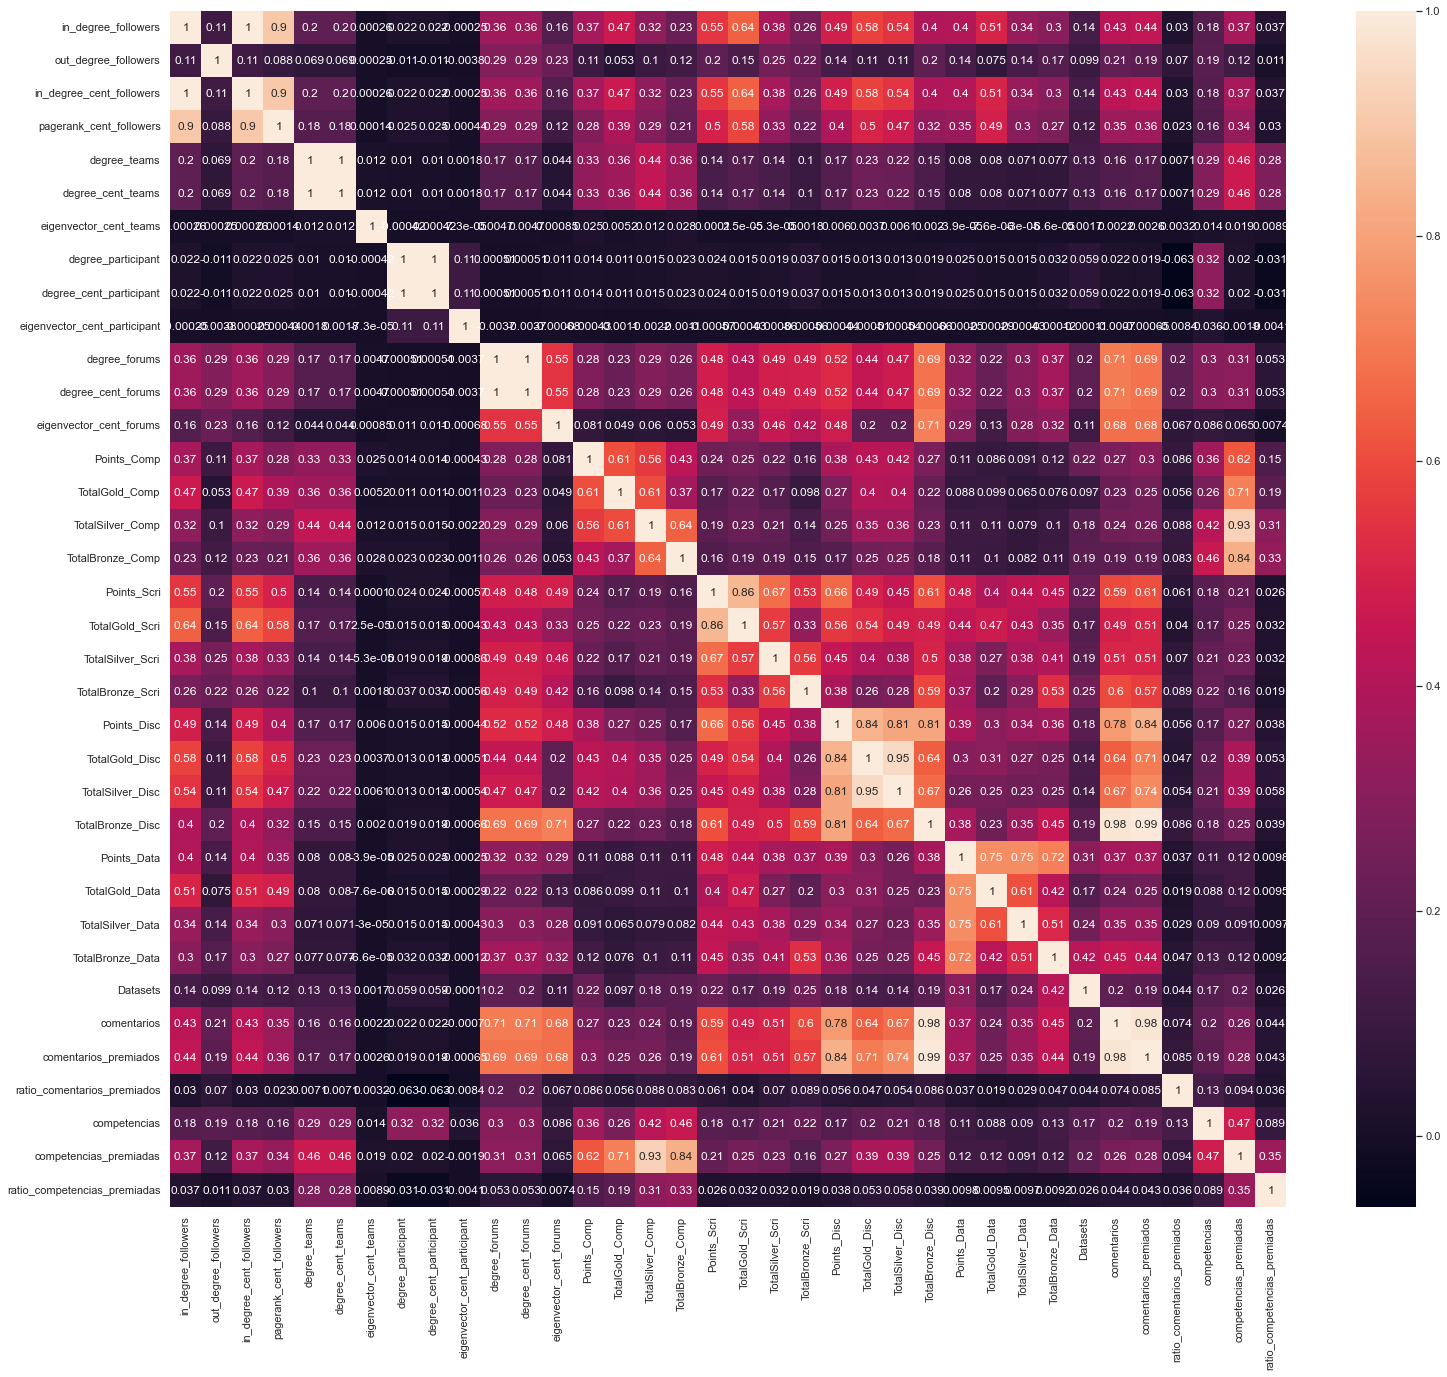

In [16]:
corrMatrix = df_nets.corr()
plt.figure(figsize=[25,22])
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Revision de Outliers

In [17]:
df_nets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676082 entries, 0 to 10087224
Data columns (total 45 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   UserId                        676082 non-null  object 
 1   UserName                      676082 non-null  object 
 2   PerformanceTier_Cat           676082 non-null  object 
 3   Seniority_Cat                 676082 non-null  object 
 4   in_degree_followers           676082 non-null  float64
 5   out_degree_followers          676082 non-null  float64
 6   in_degree_cent_followers      676082 non-null  float64
 7   pagerank_cent_followers       676082 non-null  float64
 8   degree_teams                  676082 non-null  float64
 9   degree_cent_teams             676082 non-null  float64
 10  eigenvector_cent_teams        676082 non-null  float64
 11  degree_participant            676082 non-null  float64
 12  degree_cent_participant       676082 non-n

## Metricas del grafo

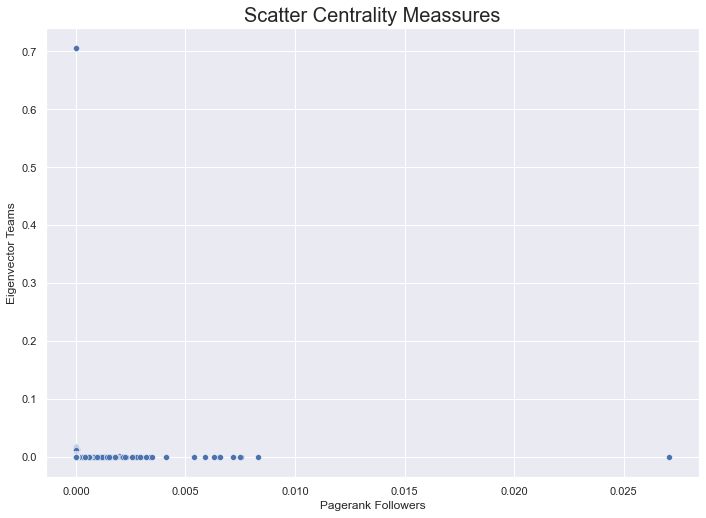

In [18]:
sns.scatterplot(data=df_nets,x="pagerank_cent_followers",y="eigenvector_cent_teams")
plt.title("Scatter Centrality Meassures",size=20)
plt.xlabel("Pagerank Followers",size=12)
plt.ylabel("Eigenvector Teams",size=12)
plt.show()

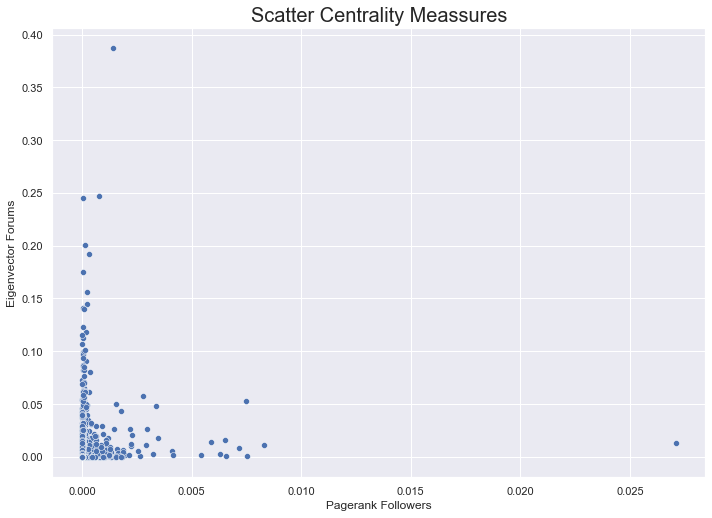

In [19]:
sns.scatterplot(data=df_nets,x="pagerank_cent_followers",y="eigenvector_cent_forums")
plt.title("Scatter Centrality Meassures",size=20)
plt.xlabel("Pagerank Followers",size=12)
plt.ylabel("Eigenvector Forums",size=12)
plt.show()

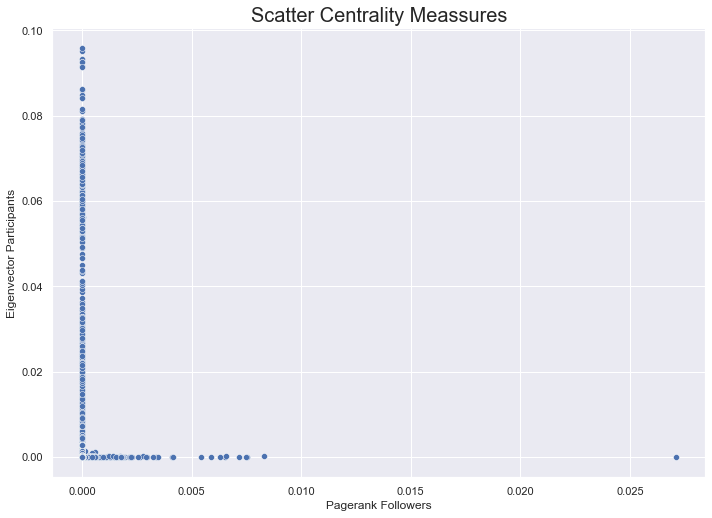

In [20]:
sns.scatterplot(data=df_nets,x="pagerank_cent_followers",y="eigenvector_cent_participant")
plt.title("Scatter Centrality Meassures",size=20)
plt.xlabel("Pagerank Followers",size=12)
plt.ylabel("Eigenvector Participants",size=12)
plt.show()

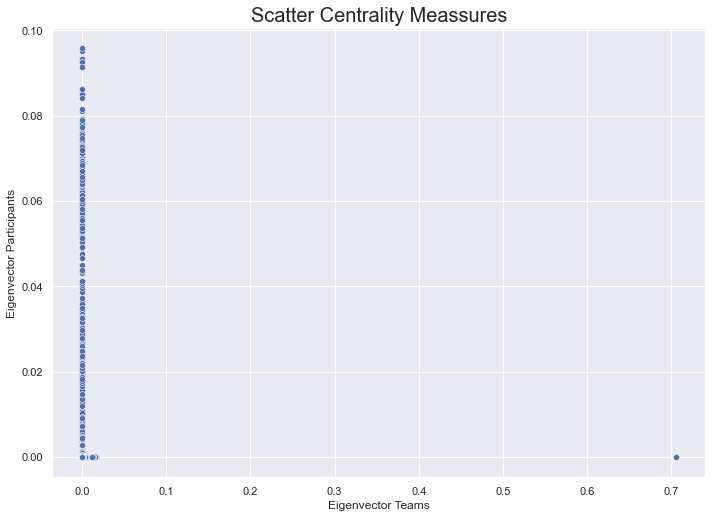

In [21]:
sns.scatterplot(data=df_nets,x="eigenvector_cent_teams",y="eigenvector_cent_participant")
plt.title("Scatter Centrality Meassures",size=20)
plt.xlabel("Eigenvector Teams",size=12)
plt.ylabel("Eigenvector Participants",size=12)
plt.show()

In [22]:
Validator.validar_numerico(df_nets[df_nets["pagerank_cent_followers"]!=0],["pagerank_cent_followers"])
#,"eigenvector_cent_teams","eigenvector_cent_forums","eigenvector_cent_participant"

,Variable,n,Missing,%Missing,Negativo,%Negativo,Zero,%Zero,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,pagerank_cent_followers,365461,0,0.0,0,0.0,0,0.0,51510,0.000003,8.988900e-07,0.027089,0.000003,0.000191,8.988900e-07,8.988900e-07,8.988900e-07,0.000002,0.000003,0.000004,0.000014,38845,10.629041,371,0.101516,36529,9.995321,17903,4.898744,3655,1.000107


In [23]:
df_user_final_3 = df_nets.copy()

In [24]:
num_cols=df_user_final_3.select_dtypes(include=['int64','float64']).columns
ctg_cols=df_user_final_3.select_dtypes(include=['object']).columns

print('Numerical Cols=',num_cols)
print('Categorical Cols=',ctg_cols)

Numerical Cols= Index(['in_degree_followers', 'out_degree_followers',
       'in_degree_cent_followers', 'pagerank_cent_followers', 'degree_teams',
       'degree_cent_teams', 'eigenvector_cent_teams', 'degree_participant',
       'degree_cent_participant', 'eigenvector_cent_participant',
       'degree_forums', 'degree_cent_forums', 'eigenvector_cent_forums',
       'Points_Comp', 'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp',
       'Points_Scri', 'TotalGold_Scri', 'TotalSilver_Scri', 'TotalBronze_Scri',
       'Points_Disc', 'TotalGold_Disc', 'TotalSilver_Disc', 'TotalBronze_Disc',
       'Points_Data', 'TotalGold_Data', 'TotalSilver_Data', 'TotalBronze_Data',
       'Datasets', 'comentarios', 'comentarios_premiados',
       'ratio_comentarios_premiados', 'competencias', 'competencias_premiadas',
       'ratio_competencias_premiadas'],
      dtype='object')
Categorical Cols= Index(['UserId', 'UserName', 'PerformanceTier_Cat', 'Seniority_Cat',
       'Flg_IsIn_Followers_Ne

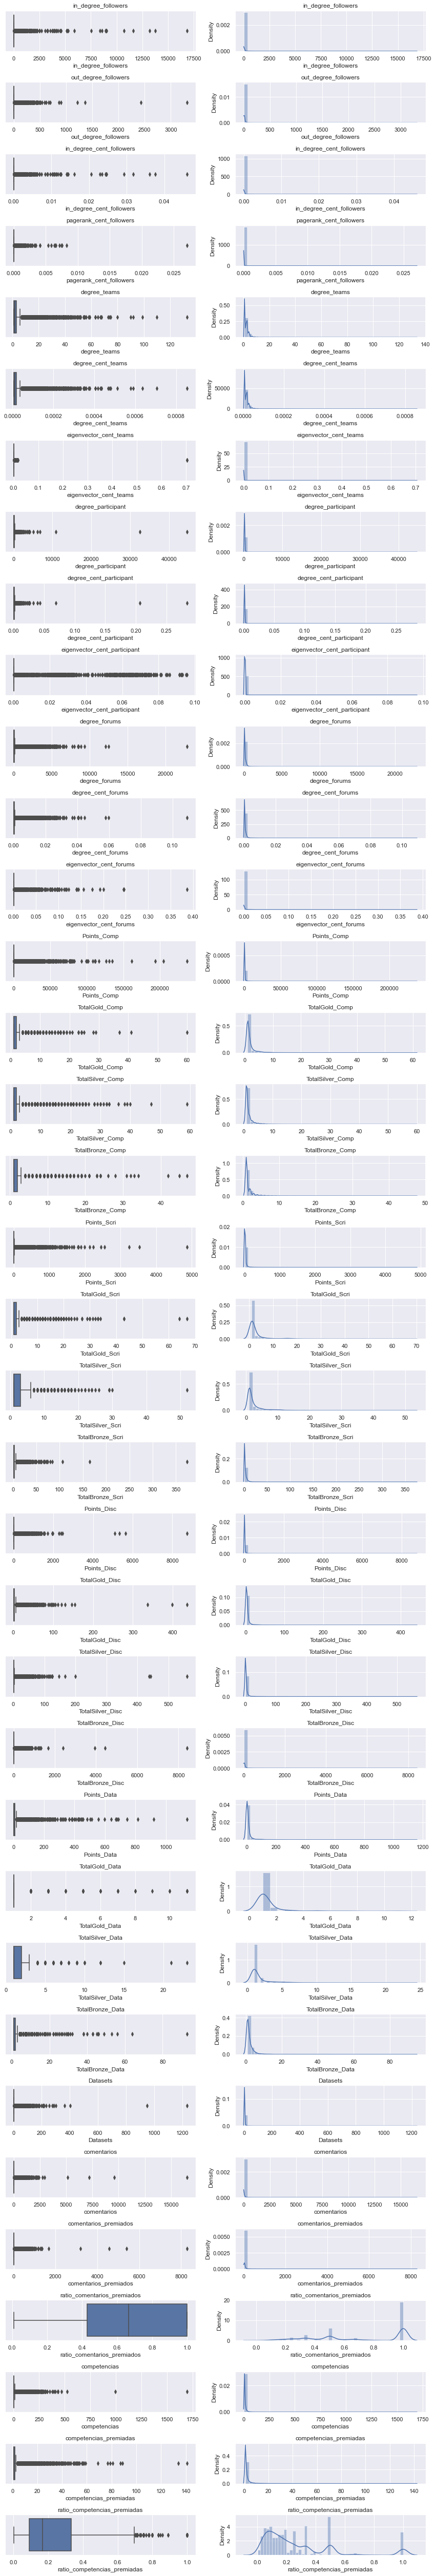

In [25]:
# Validamos por boxplots (quitando 0 de las muestras) la distribucion de las variables
cols_val=2
fig, ax = plt.subplots(len(num_cols),cols_val,figsize=(12, 70))
colours_val=range(1,len(df_user_final_3.columns))
did_not_ran=True
for i,col in enumerate(num_cols):
    for j in range(cols_val):
        if did_not_ran==True:
            sns.boxplot(df_user_final_3[df_user_final_3[col]!=0][col],ax=ax[i,j])
            ax[i,j].set_title(col)
            did_not_ran=False
        else:
            sns.distplot(df_user_final_3[df_user_final_3[col]!=0][col],ax=ax[i,j])
            ax[i,j].set_title(col)
            did_not_ran=True
plt.tight_layout()
plt.show()

In [26]:
columns = num_cols
for col in columns:
    df_tmp = df_user_final_3.copy()
    #Filtramos los 0 de cada red
    df_tmp = df_tmp[df_tmp[col]!=0]
    #Calculamos la media y std
    media = df_tmp[col].mean()
    std = df_tmp[col].std()
    _3SDMAX = media+3*std
    #Obtenemos array de los outliers por chevishev
    flg_outlier = np.where((df_user_final_3[col]> _3SDMAX),True,False)
    #Cambiamos los outliers por el max 3SD
    df_user_final_3.loc[flg_outlier,col] = _3SDMAX

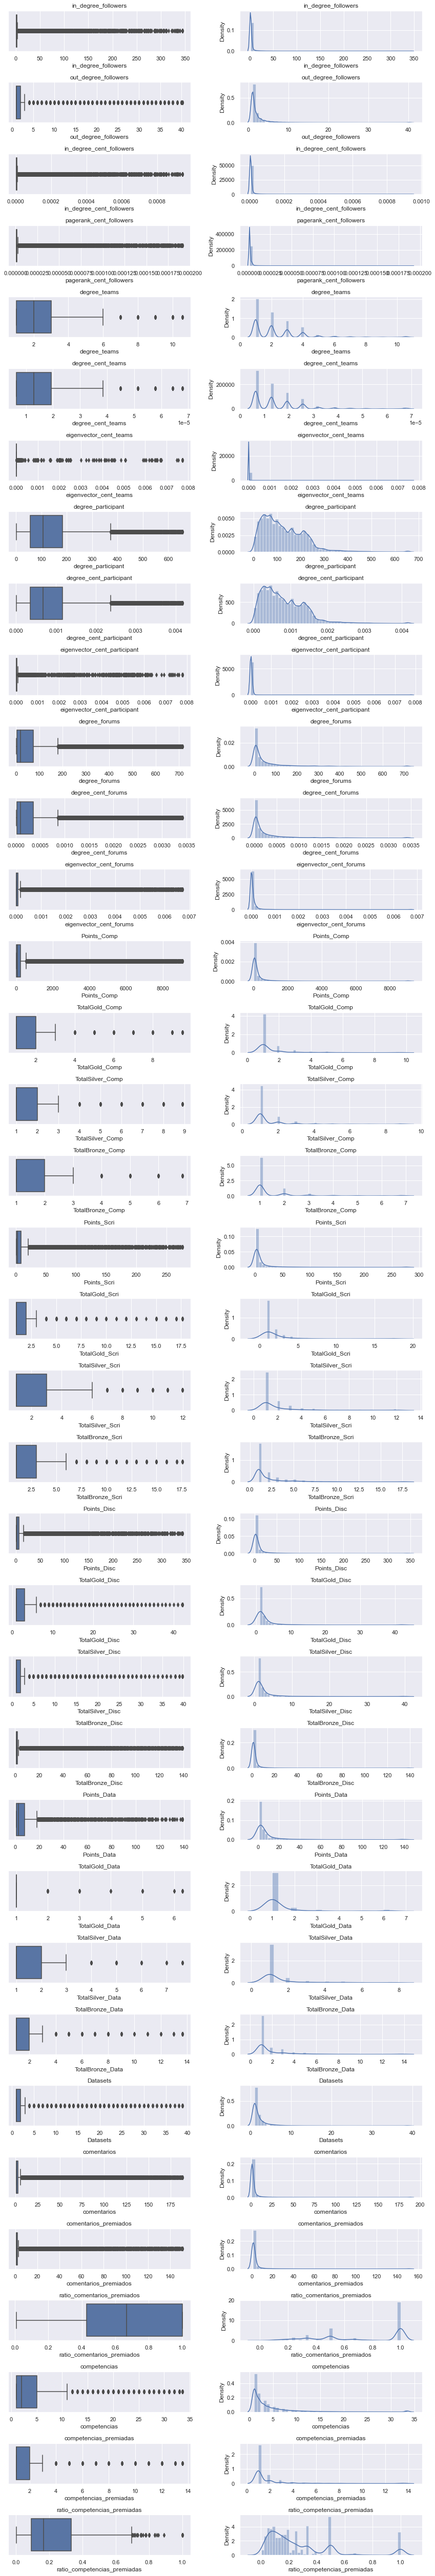

In [27]:
# Revisamos la distribucion post tratamiento de outliers
cols_val=2
fig, ax = plt.subplots(len(num_cols),cols_val,figsize=(12, 70))
colours_val=range(1,len(df_user_final_3.columns))
did_not_ran=True
for i,col in enumerate(num_cols):
    for j in range(cols_val):
        if did_not_ran==True:
            sns.boxplot(df_user_final_3[df_user_final_3[col]!=0][col],ax=ax[i,j])
            ax[i,j].set_title(col)
            did_not_ran=False
        else:
            sns.distplot(df_user_final_3[df_user_final_3[col]!=0][col],ax=ax[i,j])
            ax[i,j].set_title(col)
            did_not_ran=True
plt.tight_layout()
plt.show()

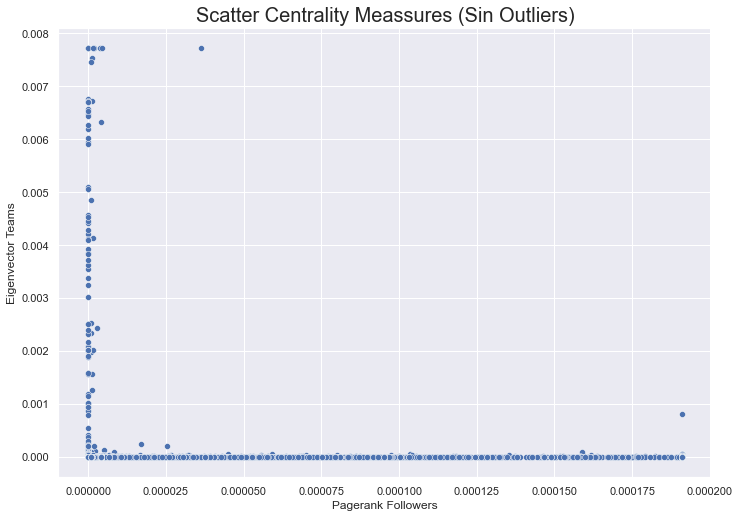

In [28]:
sns.scatterplot(data=df_user_final_3,x="pagerank_cent_followers",y="eigenvector_cent_teams")
plt.title("Scatter Centrality Meassures (Sin Outliers)",size=20)
plt.xlabel("Pagerank Followers",size=12)
plt.ylabel("Eigenvector Teams",size=12)
plt.show()

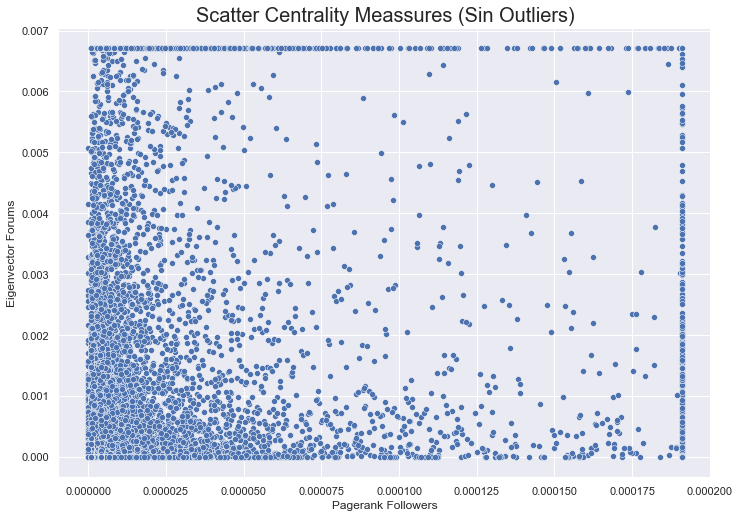

In [29]:
sns.scatterplot(data=df_user_final_3,x="pagerank_cent_followers",y="eigenvector_cent_forums")
plt.title("Scatter Centrality Meassures (Sin Outliers)",size=20)
plt.xlabel("Pagerank Followers",size=12)
plt.ylabel("Eigenvector Forums",size=12)
plt.show()

# Escalamiento + Dummies

In [31]:
# Seleccionamos las columnas a escalar
num_cols

Index(['in_degree_followers', 'out_degree_followers',
       'in_degree_cent_followers', 'pagerank_cent_followers', 'degree_teams',
       'degree_cent_teams', 'eigenvector_cent_teams', 'degree_participant',
       'degree_cent_participant', 'eigenvector_cent_participant',
       'degree_forums', 'degree_cent_forums', 'eigenvector_cent_forums',
       'Points_Comp', 'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp',
       'Points_Scri', 'TotalGold_Scri', 'TotalSilver_Scri', 'TotalBronze_Scri',
       'Points_Disc', 'TotalGold_Disc', 'TotalSilver_Disc', 'TotalBronze_Disc',
       'Points_Data', 'TotalGold_Data', 'TotalSilver_Data', 'TotalBronze_Data',
       'Datasets', 'comentarios', 'comentarios_premiados',
       'ratio_comentarios_premiados', 'competencias', 'competencias_premiadas',
       'ratio_competencias_premiadas'],
      dtype='object')

In [32]:
#Creamos una copia para no perder los datos
df_user_final_4 = df_user_final_3.copy()
df_user_final_4.head()

,UserId,UserName,PerformanceTier_Cat,Seniority_Cat,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Datasets,comentarios,comentarios_premiados,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_ParticipantComp_Net,Flg_IsIn_Forums_Net,Flg_IsIn_SomeNet
0,368,antgoldbloom,Expert,4_mas,343.966515,6.0,0.000941,0.000191,4.0,0.000026,9.451808e-26,0.0,0.000000,0.000000,713.79669,0.003411,0.001260,232.0,0.0,0.0,0.0,41.0,0.0,3.0,13.0,218.0,14.0,13.0,138.873819,79.0,1.0,3.0,6.0,21.0,187.763152,150.921464,0.267016,33.531325,0.0,0.0,Si,Si,No,Si,Si
1,381,iguyon,Expert,4_mas,6.000000,0.0,0.000016,0.000003,0.0,0.000000,0.000000e+00,163.0,0.001037,0.000024,164.00000,0.000784,0.000060,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.000000,0.0,0.0,0.0,0.0,0.0,187.763152,54.000000,0.205323,9.000000,0.0,0.0,Si,No,Si,Si,Si
6,387,nicholasgruen,Novice,4_mas,0.000000,0.0,0.000000,0.000000,4.0,0.000026,9.451808e-26,0.0,0.000000,0.000000,18.00000,0.000086,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,No,Si,No,Si,Si
8,389,anandjeyahar,Contributor,4_mas,2.000000,0.0,0.000005,0.000001,1.0,0.000006,1.171515e-26,0.0,0.000000,0.000000,100.00000,0.000478,0.000034,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,12.000000,1.000000,0.083333,17.000000,0.0,0.0,Si,Si,No,Si,Si
11,392,jmeynet,Master,4_mas,1.000000,0.0,0.000003,0.000001,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000,27.00000,0.000129,0.000001,94.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,4.000000,2.000000,0.500000,10.000000,8.0,0.8,Si,No,No,Si,Si


In [33]:
#Escalamos la data numerica entre 0-1
scaler = MinMaxScaler()
df_user_final_4[num_cols] = scaler.fit_transform(df_user_final_4[num_cols])
df_user_final_4.head()

,UserId,UserName,PerformanceTier_Cat,Seniority_Cat,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Datasets,comentarios,comentarios_premiados,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_ParticipantComp_Net,Flg_IsIn_Forums_Net,Flg_IsIn_SomeNet
0,368,antgoldbloom,Expert,4_mas,1.000000,0.149281,1.000000,1.000000,0.379128,0.379128,1.224451e-23,0.000000,0.000000,0.000000,1.000000,1.000000,0.187723,0.025624,0.00000,0.000000,0.0,0.148658,0.0,0.251028,0.740213,0.637735,0.332808,0.327780,1.000000,0.570878,0.159769,0.39312,0.439907,0.542222,1.000000,1.000000,0.267016,1.000000,0.00000,0.0,Si,Si,No,Si,Si
1,381,iguyon,Expert,4_mas,0.017444,0.000000,0.017444,0.015561,0.000000,0.000000,0.000000e+00,0.248961,0.248961,0.003026,0.229757,0.229757,0.008970,0.000442,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.025214,0.381641,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.357802,0.205323,0.268406,0.00000,0.0,Si,No,Si,Si,Si
6,387,nicholasgruen,Novice,4_mas,0.000000,0.000000,0.000000,0.000000,0.379128,0.379128,1.224451e-23,0.000000,0.000000,0.000000,0.025217,0.025217,0.000303,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.025214,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.005326,0.006626,1.000000,0.029823,0.00000,0.0,No,Si,No,Si,Si
8,389,anandjeyahar,Contributor,4_mas,0.005815,0.000000,0.005815,0.006400,0.094782,0.094782,1.517660e-24,0.000000,0.000000,0.000000,0.140096,0.140096,0.005130,0.002651,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007201,0.000000,0.000000,0.00000,0.000000,0.000000,0.063910,0.006626,0.083333,0.506989,0.00000,0.0,Si,Si,No,Si,Si
11,392,jmeynet,Master,4_mas,0.002907,0.000000,0.002907,0.006203,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.037826,0.037826,0.000198,0.010382,0.10504,0.787287,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014402,0.000000,0.000000,0.00000,0.000000,0.000000,0.021303,0.013252,0.500000,0.298229,0.59072,0.8,Si,No,No,Si,Si


In [34]:
#Validamos si se escalo correctamente
Validator.validar_numerico(df_user_final_4,num_cols)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Zero,%Zero,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,in_degree_followers,676082,0,0.0,0,0.0,522614,77.300387,287,0.002666,0.0,1.0,0.000000,0.085404,0.0,0.0,0.000000,0.000000,2.907260e-03,5.814519e-03,3.197986e-02,153468,22.699613,2777,0.410749,51924,7.680133,28972,4.285279,6696,0.990412
0,out_degree_followers,676082,0,0.0,0,0.0,375408,55.526992,42,0.030969,0.0,1.0,0.062200,0.295231,0.0,0.0,0.000000,0.024880,7.464052e-02,1.244009e-01,4.478431e-01,71349,10.553306,12189,1.802888,49528,7.325739,29499,4.363228,6422,0.949885
0,in_degree_cent_followers,676082,0,0.0,0,0.0,522614,77.300387,287,0.002666,0.0,1.0,0.000000,0.085404,0.0,0.0,0.000000,0.000000,2.907260e-03,5.814519e-03,3.197986e-02,153468,22.699613,2777,0.410749,51924,7.680133,28972,4.285279,6696,0.990412
0,pagerank_cent_followers,676082,0,0.0,0,0.0,310621,45.944279,51129,0.005904,0.0,1.0,0.011770,0.100922,0.0,0.0,0.004708,0.004708,9.456164e-03,1.885953e-02,4.135817e-02,54330,8.036007,2848,0.421251,67609,10.000118,33785,4.997175,6761,1.000027
0,degree_teams,676082,0,0.0,0,0.0,524521,77.582453,12,0.051263,0.0,1.0,0.000000,0.426310,0.0,0.0,0.000000,0.000000,1.895640e-01,2.843460e-01,5.686920e-01,151561,22.417547,13005,1.923583,54165,8.011602,28903,4.275073,5734,0.848122
0,degree_cent_teams,676082,0,0.0,0,0.0,524521,77.582453,12,0.051263,0.0,1.0,0.000000,0.426310,0.0,0.0,0.000000,0.000000,1.895640e-01,2.843460e-01,5.686920e-01,151561,22.417547,13005,1.923583,54165,8.011602,28903,4.275073,5734,0.848122
0,eigenvector_cent_teams,676082,0,0.0,0,0.0,524521,77.582453,24923,0.000093,0.0,1.0,0.000000,0.025139,0.0,0.0,0.000000,0.000000,1.216818e-26,6.228789e-23,8.125581e-07,151561,22.417547,115,0.017010,67569,9.994202,33805,5.000133,6761,1.000027
0,degree_participant,676082,0,0.0,0,0.0,522832,77.332631,641,0.043821,0.0,1.0,0.000000,0.356519,0.0,0.0,0.000000,0.000000,1.863393e-01,2.947826e-01,4.291913e-01,153250,22.667369,15978,2.363323,67535,9.989173,33561,4.964043,6755,0.999139
0,degree_cent_participant,676082,0,0.0,0,0.0,522832,77.332631,641,0.043821,0.0,1.0,0.000000,0.356519,0.0,0.0,0.000000,0.000000,1.863393e-01,2.947826e-01,4.291913e-01,153250,22.667369,15978,2.363323,67535,9.989173,33561,4.964043,6755,0.999139
0,eigenvector_cent_participant,676082,0,0.0,0,0.0,522832,77.332631,32367,0.001717,0.0,1.0,0.000000,0.092757,0.0,0.0,0.000000,0.000000,1.014033e-03,6.271747e-03,1.194752e-02,153250,22.667369,1132,0.167435,67494,9.983109,33793,4.998358,6705,0.991744


In [35]:
# Guardamos el dataframe escalado numericamente + variables categoricas
df_user_final_4.to_csv(r"../data/processed/df1_catnum.csv",index=False)

In [36]:
del flg_outlier

In [38]:
ctg_cols

Index(['UserName', 'PerformanceTier_Cat', 'Seniority_Cat',
       'Flg_IsIn_Followers_Net', 'Flg_IsIn_Teams_Net',
       'Flg_IsIn_ParticipantComp_Net', 'Flg_IsIn_Forums_Net',
       'Flg_IsIn_SomeNet'],
      dtype='object')

In [39]:
ctg_cols = ctg_cols[2:]
print(ctg_cols)

Index(['PerformanceTier_Cat', 'Seniority_Cat', 'Flg_IsIn_Followers_Net',
       'Flg_IsIn_Teams_Net', 'Flg_IsIn_ParticipantComp_Net',
       'Flg_IsIn_Forums_Net', 'Flg_IsIn_SomeNet'],
      dtype='object')


In [40]:
#Obtenemos los valores dummies para nuestras variables categoricas
df_dummies = pd.get_dummies(df_user_final_4[ctg_cols],drop_first=True)
df_dummies.head()

,PerformanceTier_Cat_Expert,PerformanceTier_Cat_Grandmaster,PerformanceTier_Cat_Master,PerformanceTier_Cat_Novice,Seniority_Cat_0_05,Seniority_Cat_1_2,Seniority_Cat_2_3,Seniority_Cat_3_4,Seniority_Cat_4_mas,Flg_IsIn_Followers_Net_Si,Flg_IsIn_Teams_Net_Si,Flg_IsIn_ParticipantComp_Net_Si,Flg_IsIn_Forums_Net_Si
0,1,0,0,0,0,0,0,0,1,1,1,0,1
1,1,0,0,0,0,0,0,0,1,1,0,1,1
6,0,0,0,1,0,0,0,0,1,0,1,0,1
8,0,0,0,0,0,0,0,0,1,1,1,0,1
11,0,0,1,0,0,0,0,0,1,1,0,0,1


In [41]:
#Borramos las columnas categoricas
df_user_final_4.drop(columns=ctg_cols,inplace=True)
#Agregamos las nuevas columnas dummies
df_user_final_5 = df_user_final_4.join(df_dummies)
df_user_final_5.head()

,UserId,UserName,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Datasets,comentarios,comentarios_premiados,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,PerformanceTier_Cat_Expert,PerformanceTier_Cat_Grandmaster,PerformanceTier_Cat_Master,PerformanceTier_Cat_Novice,Seniority_Cat_0_05,Seniority_Cat_1_2,Seniority_Cat_2_3,Seniority_Cat_3_4,Seniority_Cat_4_mas,Flg_IsIn_Followers_Net_Si,Flg_IsIn_Teams_Net_Si,Flg_IsIn_ParticipantComp_Net_Si,Flg_IsIn_Forums_Net_Si
0,368,antgoldbloom,1.000000,0.149281,1.000000,1.000000,0.379128,0.379128,1.224451e-23,0.000000,0.000000,0.000000,1.000000,1.000000,0.187723,0.025624,0.00000,0.000000,0.0,0.148658,0.0,0.251028,0.740213,0.637735,0.332808,0.327780,1.000000,0.570878,0.159769,0.39312,0.439907,0.542222,1.000000,1.000000,0.267016,1.000000,0.00000,0.0,1,0,0,0,0,0,0,0,1,1,1,0,1
1,381,iguyon,0.017444,0.000000,0.017444,0.015561,0.000000,0.000000,0.000000e+00,0.248961,0.248961,0.003026,0.229757,0.229757,0.008970,0.000442,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.025214,0.381641,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.357802,0.205323,0.268406,0.00000,0.0,1,0,0,0,0,0,0,0,1,1,0,1,1
6,387,nicholasgruen,0.000000,0.000000,0.000000,0.000000,0.379128,0.379128,1.224451e-23,0.000000,0.000000,0.000000,0.025217,0.025217,0.000303,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.025214,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.005326,0.006626,1.000000,0.029823,0.00000,0.0,0,0,0,1,0,0,0,0,1,0,1,0,1
8,389,anandjeyahar,0.005815,0.000000,0.005815,0.006400,0.094782,0.094782,1.517660e-24,0.000000,0.000000,0.000000,0.140096,0.140096,0.005130,0.002651,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007201,0.000000,0.000000,0.00000,0.000000,0.000000,0.063910,0.006626,0.083333,0.506989,0.00000,0.0,0,0,0,0,0,0,0,0,1,1,1,0,1
11,392,jmeynet,0.002907,0.000000,0.002907,0.006203,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.037826,0.037826,0.000198,0.010382,0.10504,0.787287,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014402,0.000000,0.000000,0.00000,0.000000,0.000000,0.021303,0.013252,0.500000,0.298229,0.59072,0.8,0,0,1,0,0,0,0,0,1,1,0,0,1


In [42]:
# Guardamos el dataframe escalado numericamente + variables categoricas dummizadas
df_user_final_5.to_csv(r"../data/processed/df1_dummienum.csv",index=False)

: 